# Analysis of Titanic Dataset

Background information from history.com (link in the *References* section): "At 2:20 a.m. on April 15, 1912, the British ocean liner Titanic sinks into the North Atlantic Ocean about 400 miles south of Newfoundland, Canada. The massive ship, which carried 2,200 passengers and crew, had struck an iceberg two and half hours before."

In my analysis, I am going to investigate if there are any patterns present that can be seen of the passengers of Titanic. The following questions will be answered: What age group and gender was more likely to survive the sinking of the RMS Titanic? Is there any relation between the passengers' wealth and the likelihoodness of their survival?

### Observations about the data

There have been about 2200 passengers on board at the time of the tragic accident, however, this dataset contains information on 891 passengers. Therefore, this dataset is limited.

**Variables:**

1. **pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

2. **age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3. **sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

4. **parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [86]:
# Imports
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [87]:
titanic_df = pd.read_csv("../Project/titanic_data.csv")

# preview the data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Cleaning and Wrangling Data

In [89]:
# Dropping unnecessary columns, which will not be useful in analysis
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked'], axis=1)

titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [90]:
# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0: 'Died', 1: 'Survived'})
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [91]:
# Create Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
titanic_df.Class.head()

0    Lower Class
1    Upper Class
2    Lower Class
3    Upper Class
4    Lower Class
Name: Class, dtype: object

In [92]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Survival,Class
0,0,3,male,22.0,1,0,7.2500,Died,Lower Class
1,1,1,female,38.0,1,0,71.2833,Survived,Upper Class
2,1,3,female,26.0,0,0,7.9250,Survived,Lower Class
3,1,1,female,35.0,1,0,53.1000,Survived,Upper Class
4,0,3,male,35.0,0,0,8.0500,Died,Lower Class


### Answering The Main Questions

#### What age group was more likely to survive the sinking of the RMS Titanic?

In [93]:
#info on all passangers's age

age_data = titanic_df["Age"].describe()
print age_data

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


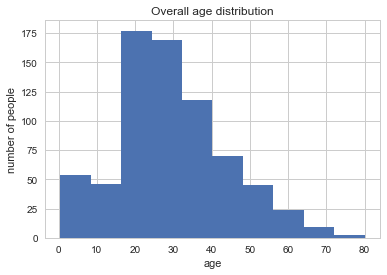

In [94]:
#overall age distribution

histogram1 = titanic_df['Age'].hist()
histogram1.set_title('Overall age distribution')
histogram1.set_xlabel('age')
histogram1.set_ylabel('number of people')

In [95]:
#info on survived passangers's age

age_survived = titanic_df["Age"][titanic_df["Survived"] == 1]
age_survived.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

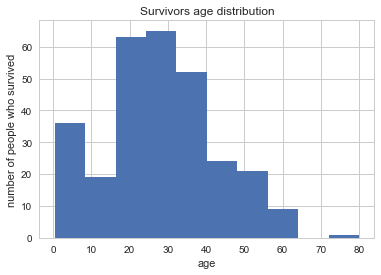

In [96]:
#survivors age distribution

histogram2 = age_survived.hist()
histogram2.set_title('Survivors age distribution')
histogram2.set_xlabel('age')
histogram2.set_ylabel('number of people who survived')

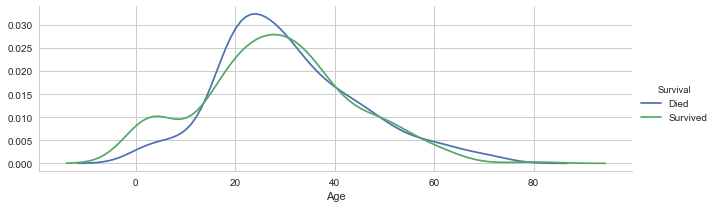

In [97]:
#survivors/not survivors by their age

comparison1 = sns.FacetGrid(titanic_df, hue="Survival",aspect=3)
comparison1.map(sns.kdeplot,'Age')
comparison1.add_legend()

**Conclusion:** As we can see from the density plot, the chance of survival is greater for younger passengers (for age < 18).  A density plot visualises the distribution of data over the age of passengers. 

There are 290 people who survived and also have age information available in the dataset. The average age of those who survived was one age lower than the average age of all passengers.

#### Which gender was more likely to survive the sinking of the RMS Titanic?

In [98]:
#overall gender

gender_data = titanic_df['Sex'].describe()
print gender_data

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


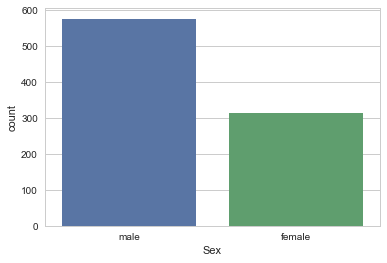

In [99]:
sns.countplot('Sex', data=titanic_df)

In [100]:
#survived

gender_survived = titanic_df['Sex'][titanic_df['Survived'] == 1]
print gender_survived.describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object


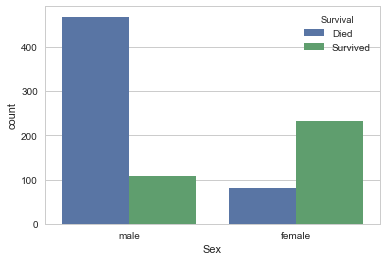

In [101]:
sns.countplot('Sex', hue='Survival', data=titanic_df)

**Conclusion:** Although initially there were about twice as many male than female passengers, after the incident about twice as many female passengers could have survived based on our limited data. This seems to be a reasonable estimate for all 2200 passengers, if we consider that children and female passengers are the first to be rescued by crew in the event of an emergency.

#### Is there any relation between the passengers' wealth and the likelihoodness of their survival?

In [102]:
#creating another column to categorize fares

titanic_df['fare_groups'] = pd.cut(titanic_df.Fare, [0,50,100,150,200,250,300,350,400,450,500,550])

In [103]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Survival,Class,fare_groups
0,0,3,male,22.0,1,0,7.2500,Died,Lower Class,"(0, 50]"
1,1,1,female,38.0,1,0,71.2833,Survived,Upper Class,"(50, 100]"
2,1,3,female,26.0,0,0,7.9250,Survived,Lower Class,"(0, 50]"
3,1,1,female,35.0,1,0,53.1000,Survived,Upper Class,"(50, 100]"
4,0,3,male,35.0,0,0,8.0500,Died,Lower Class,"(0, 50]"


In [104]:
piv_fare = titanic_df.pivot_table(index='fare_groups', columns='Survival', values = 'Fare', aggfunc='count')
print piv_fare

Survival      Died  Survived
fare_groups                 
(0, 50]      484.0     232.0
(50, 100]     37.0      70.0
(100, 150]     5.0      19.0
(150, 200]     3.0       6.0
(200, 250]     4.0       7.0
(250, 300]     2.0       4.0
(300, 350]     NaN       NaN
(350, 400]     NaN       NaN
(400, 450]     NaN       NaN
(450, 500]     NaN       NaN
(500, 550]     NaN       3.0


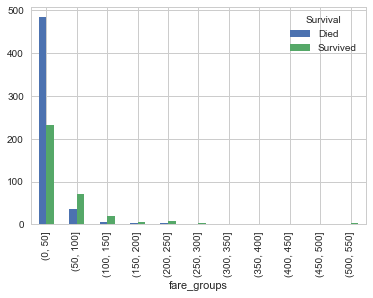

In [105]:
piv_fare.plot(kind='bar')

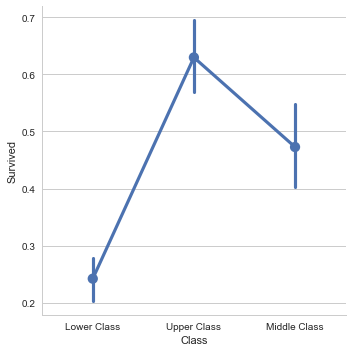

In [106]:
sns.factorplot(x ='Class',y= 'Survived', data=titanic_df, size=5)

**Conclusion:** Based on the available information, we can state that the more money the ticket was purchased for, the more likely the passenger could have survived. We should, however, acknowledge that we do not have information on the passengers' income, therefore, we should not conclude they were wealthier based on the price paid for the ticket.

### Findings:

There have been about 2200 passengers on board at the time of the tragic accident, however, this dataset contains information on 891 passengers. 
The limitations of the data come from the sample size and omitted variables. Omitted variables can be the health of passengers, which could also influence the chances of survival, and the income level.

Based on the available data, it seems that young upper class women had the highest chances of survival. 

### References

1. Titanic Sinks http://www.history.com/this-day-in-history/titanic-sinks
2. Numpy documentation: https://docs.scipy.org/doc/numpy/index.html
3. Study by Omar El Gabry, A Journey through Titanic: https://www.kaggle.com/luyujia/titanic/a-journey-through-titanic
4. Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/index.html
5. Stack overflow: http://stackoverflow.com/questions/40098404